<h2>Fashion MNIST dataset in Keras library</h2>

## Imports

In [1]:
# - TensorFlow
import tensorflow as tf
# - Dataset
from tensorflow.keras.datasets import fashion_mnist
# - Helper libraries
import numpy as np
import pandas as pd
import time
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
# - Graph plots
%matplotlib inline
from matplotlib import pyplot as plt
# - Keras models and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Convolution2D, MaxPooling2D

# Print some stuff
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.2.0


<h2>Load data</h2>

In [2]:
# Load pre-shuffled Fashion MNIST data into train and test sets
(X_train, y_train_raw), (X_test, y_test_raw) = fashion_mnist.load_data()

# Convert to float values and normalize between 0...1
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255 
X_test /= 255

# Preprocess class labels
# Convert labels to 10-dimensional one-hot vectors
y_train = to_categorical(y_train_raw, 10)
y_test = to_categorical(y_test_raw, 10)

print("Training instances: {}".format(X_train.shape[0]))
print("Test instances: {}".format(X_test.shape[0]))
print()
print("Structure of training set: {}".format(X_train.shape))
print("Structure of labels set: {}".format(y_train.shape))

Training instances: 60000
Test instances: 10000

Structure of training set: (60000, 28, 28)
Structure of labels set: (60000, 10)


<h2>Pre-process data for 1D or 2D inputs</h2>

In [3]:
# Preprocess for 1D input data
X_train_1D = X_train.reshape(X_train.shape[0], 784)
X_test_1D = X_test.reshape(X_test.shape[0], 784)
print("1D shape:", X_train_1D.shape)

# Preprocess for 2D input data
X_train_2D = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_2D = X_test.reshape(X_test.shape[0], 28, 28, 1)
print("2D shape:", X_train_2D.shape)

1D shape: (60000, 784)
2D shape: (60000, 28, 28, 1)


## Linear model

Epoch 1/6
844/844 [==============================] - 1s 1ms/step - loss: 0.6753 - accuracy: 0.7742 - val_loss: 0.5105 - val_accuracy: 0.8255
Epoch 2/6
844/844 [==============================] - 1s 971us/step - loss: 0.4904 - accuracy: 0.8352 - val_loss: 0.4666 - val_accuracy: 0.8385
Epoch 3/6
844/844 [==============================] - 1s 925us/step - loss: 0.4552 - accuracy: 0.8452 - val_loss: 0.4514 - val_accuracy: 0.8450
Epoch 4/6
844/844 [==============================] - 1s 941us/step - loss: 0.4361 - accuracy: 0.8510 - val_loss: 0.4289 - val_accuracy: 0.8543
Epoch 5/6
844/844 [==============================] - 1s 882us/step - loss: 0.4254 - accuracy: 0.8538 - val_loss: 0.4271 - val_accuracy: 0.8503
Epoch 6/6
844/844 [==============================] - 1s 901us/step - loss: 0.4171 - accuracy: 0.8562 - val_loss: 0.4307 - val_accuracy: 0.8503

Test Accuracy: 83.86%
Time elapsed: 5.38 sec


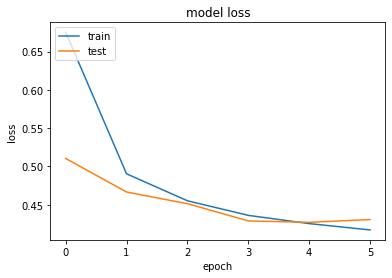

In [4]:
# Create Linear Softmax model
lin_clf = Sequential()
lin_clf.add(Dense(10, input_dim=784, activation="softmax"))

# Compile model
lin_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Start timer
start = time.time()

# Train model on training data
history = lin_clf.fit(X_train_1D, y_train, batch_size=64, epochs=6, validation_split=0.1, verbose=1)
# Evaluate model on test data
score = lin_clf.evaluate(X_test_1D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## NN model

Epoch 1/8
844/844 [==============================] - 1s 1ms/step - loss: 0.6025 - accuracy: 0.7858 - val_loss: 0.4214 - val_accuracy: 0.8490
Epoch 2/8
844/844 [==============================] - 1s 1ms/step - loss: 0.4304 - accuracy: 0.8447 - val_loss: 0.3767 - val_accuracy: 0.8597
Epoch 3/8
844/844 [==============================] - 1s 1ms/step - loss: 0.3880 - accuracy: 0.8584 - val_loss: 0.3523 - val_accuracy: 0.8688
Epoch 4/8
844/844 [==============================] - 1s 1ms/step - loss: 0.3658 - accuracy: 0.8653 - val_loss: 0.3552 - val_accuracy: 0.8622
Epoch 5/8
844/844 [==============================] - 1s 1ms/step - loss: 0.3489 - accuracy: 0.8730 - val_loss: 0.3345 - val_accuracy: 0.8768
Epoch 6/8
844/844 [==============================] - 1s 1ms/step - loss: 0.3354 - accuracy: 0.8754 - val_loss: 0.3225 - val_accuracy: 0.8793
Epoch 7/8
844/844 [==============================] - 1s 1ms/step - loss: 0.3286 - accuracy: 0.8797 - val_loss: 0.3227 - val_accuracy: 0.8797
Epoch 8/8
844

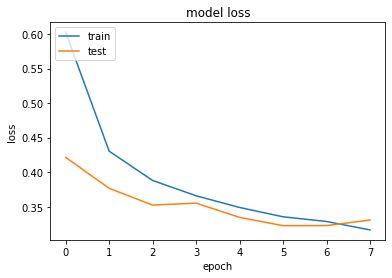

In [5]:
# Create Neural Net Softmax model
nn_clf = Sequential()
# - first Dense
nn_clf.add(Dense(128, input_dim=784, activation="relu", kernel_initializer="normal"))
nn_clf.add(Dropout(0.2))
# - second Dense
nn_clf.add(Dense(128, activation="relu", kernel_initializer="he_normal"))
nn_clf.add(Dropout(0.2))
# - output
nn_clf.add(Dense(10, activation="softmax"))

# Compile model
nn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Start timer
start = time.time()

# Train model on training data
history = nn_clf.fit(X_train_1D, y_train, batch_size=64, epochs=8, validation_split=0.1, verbose=1)
# Evaluate model on test data
score = nn_clf.evaluate(X_test_1D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## ConvNet model

Epoch 1/8
844/844 [==============================] - 26s 30ms/step - loss: 0.6050 - accuracy: 0.7807 - val_loss: 0.3701 - val_accuracy: 0.8648
Epoch 2/8
844/844 [==============================] - 26s 31ms/step - loss: 0.3930 - accuracy: 0.8578 - val_loss: 0.3116 - val_accuracy: 0.8902
Epoch 3/8
844/844 [==============================] - 26s 31ms/step - loss: 0.3445 - accuracy: 0.8754 - val_loss: 0.2809 - val_accuracy: 0.8992
Epoch 4/8
844/844 [==============================] - 26s 31ms/step - loss: 0.3132 - accuracy: 0.8851 - val_loss: 0.2665 - val_accuracy: 0.9030
Epoch 5/8
844/844 [==============================] - 26s 31ms/step - loss: 0.2937 - accuracy: 0.8936 - val_loss: 0.2405 - val_accuracy: 0.9095
Epoch 6/8
844/844 [==============================] - 26s 31ms/step - loss: 0.2712 - accuracy: 0.9007 - val_loss: 0.2276 - val_accuracy: 0.9172
Epoch 7/8
844/844 [==============================] - 27s 32ms/step - loss: 0.2596 - accuracy: 0.9043 - val_loss: 0.2268 - val_accuracy: 0.9165

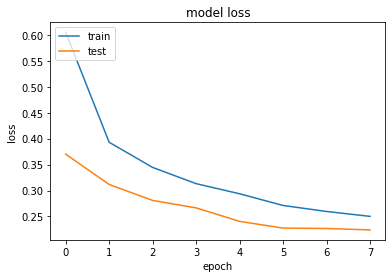

In [6]:
# Create ConvNet model
cnn_clf = Sequential()
# - first conv/pool 
cnn_clf.add(Convolution2D(32, (3,3), input_shape=(28,28,1), activation="relu", padding="same", kernel_initializer="he_uniform"))
cnn_clf.add(MaxPooling2D(pool_size=(2,2))) # reduces size to 14x14
cnn_clf.add(Dropout(0.3))
# - second conv/pool
cnn_clf.add(Convolution2D(64, (3,3), activation="relu", padding="same", kernel_initializer="he_uniform"))
cnn_clf.add(MaxPooling2D(pool_size=(2,2))) # reduces size to 7x7
cnn_clf.add(Dropout(0.3))
# - fully connected
cnn_clf.add(Flatten())
cnn_clf.add(Dense(128, activation="relu"))
cnn_clf.add(Dropout(0.3))
# - output
cnn_clf.add(Dense(10, activation="softmax"))

# Compile model
cnn_clf.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Start timer
start = time.time()

# Train model on training data
history = cnn_clf.fit(X_train_2D, y_train, batch_size=64, epochs=8, validation_split=0.1, verbose=1)
# Evaluate model on test data
score = cnn_clf.evaluate(X_test_2D, y_test, verbose=0)

# Stop timer
end = time.time()

# Print results
print("\nTest Accuracy: {0:0.2f}%".format(score[1] * 100))
print("Time elapsed: {0:0.2f} sec".format(end - start))

# Plot training history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h2>Confusion matrix</h2>

In [7]:
# Make predictions
y_pred = cnn_clf.predict(X_test_2D)

# Confusion matrix
conf_mx = confusion_matrix(
    np.argmax(y_test,axis=1), 
    np.argmax(y_pred, axis=1))
print(conf_mx)

[[930   0  16  13   4   1  29   0   7   0]
 [  0 977   0  17   3   0   1   0   2   0]
 [ 23   1 907   9  38   0  22   0   0   0]
 [ 32   2   9 927  17   0  12   0   1   0]
 [  2   0  71  27 854   0  45   0   1   0]
 [  0   0   0   0   0 978   0  15   0   7]
 [175   1  89  31  75   0 622   0   7   0]
 [  0   0   0   0   0   4   0 982   0  14]
 [  4   1   1   5   0   2   2   3 982   0]
 [  0   0   0   0   0   4   1  32   0 963]]


<h2>Predict examples</h2>

Predicted: Ankle boot
Actual: Ankle boot


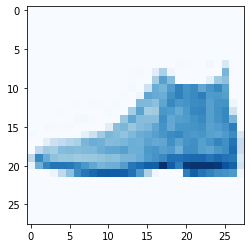

Predicted: Pullover
Actual: Pullover


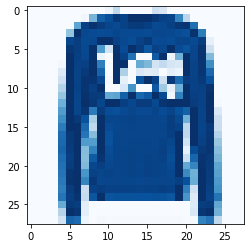

Predicted: Trouser
Actual: Trouser


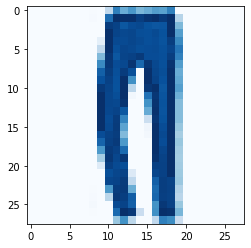

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Examples to classify
examples = X_test_2D[:3]

res = np.argmax(cnn_clf.predict(examples), axis=1)

for i in range(0,len(res)):
    print("Predicted:",class_names[res[i]])
    print("Actual:",class_names[y_test_raw[i]])
    plt.imshow(X_test[i], cmap=plt.cm.Blues)
    plt.show()